<a href="https://colab.research.google.com/github/nomarine/intro_machine_learning/blob/main/Introdu%C3%A7%C3%A3o_%C3%A0_ML_Classifica%C3%A7%C3%A3o_Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dataset = pd.read_csv(uri)
colunas_renomeadas = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_previstas',
    'price' : 'preco',
}
dataset = dataset.rename(columns = colunas_renomeadas)
dataset.head()

,nao_finalizado,horas_previstas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
inversao_nao_finalizado = {
    0:1,
    1:0
}
dataset['finalizado'] = dataset['nao_finalizado'].map(inversao_nao_finalizado)
dataset.tail()

,nao_finalizado,horas_previstas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


#Representação gráfica

<Axes: xlabel='horas_previstas', ylabel='preco'>

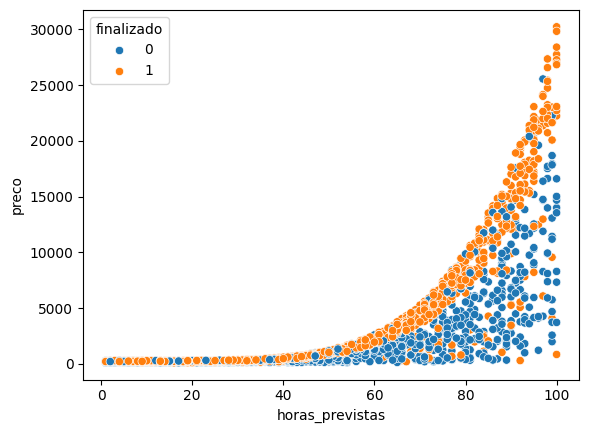

In [ ]:
import seaborn as sns
sns.scatterplot(data=dataset, x='horas_previstas', y='preco', hue='finalizado')

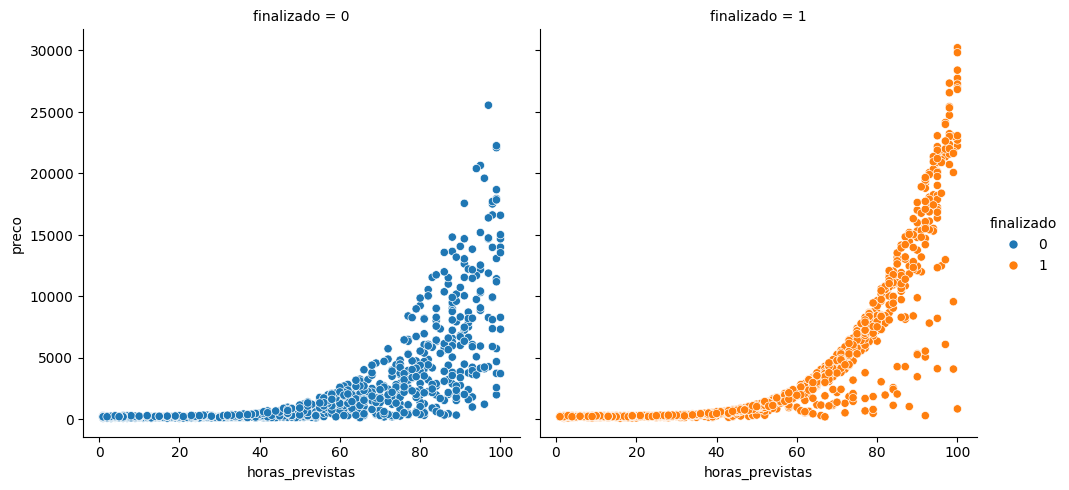

In [ ]:
sns.relplot(data=dataset, x='horas_previstas', y='preco', col='finalizado', hue='finalizado')

#Modelagem

In [ ]:
x = dataset[["horas_previstas","preco"]]
y = dataset["finalizado"]

In [ ]:
from sklearn.model_selection import train_test_split

seed = 20
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print("Amostra de treino = %d | Amostras de teste = %d" % (len(treino_x), len(teste_y)))

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(treino_x, treino_y)
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsao) * 100
print("Acurácia = %.2f%%" % (acuracia))

Amostra de treino = 1617 | Amostras de teste = 540
Acurácia = 51.48%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print(teste_y.value_counts())
print(treino_y.value_counts())

finalizado
1    284
0    256
Name: count, dtype: int64
finalizado
1    850
0    767
Name: count, dtype: int64


In [ ]:
import numpy as np

previsao_baseline = np.ones(540)
acuracia = accuracy_score(teste_y, previsao_baseline) * 100
print("Acurácia = %.2f%%" % (acuracia))

Acurácia = 52.59%


<Axes: xlabel='horas_previstas', ylabel='preco'>

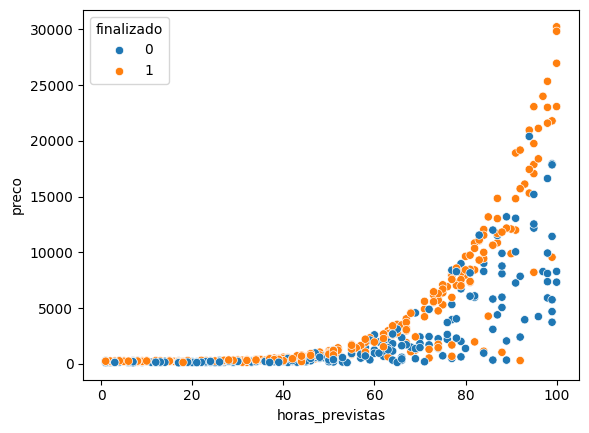

In [ ]:
sns.scatterplot(data=teste_x, x='horas_previstas', y='preco', hue=teste_y)

#Modelagem de pontos

In [ ]:
x_min = teste_x['horas_previstas'].min()
x_max = teste_x['horas_previstas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(pontos)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
print(xx)
print(z.shape)

[[ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 ...
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]
 [ 1.    1.99  2.98 ... 97.03 98.02 99.01]]
(100, 100)


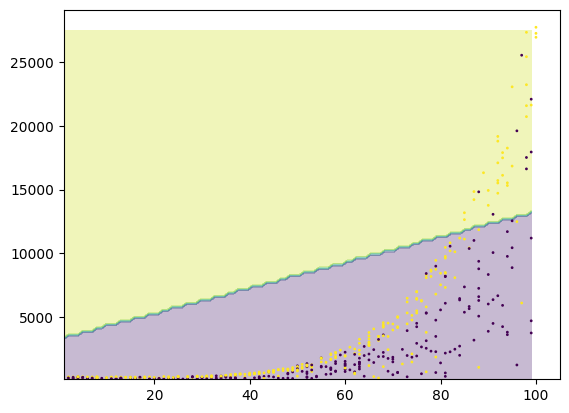

In [ ]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(teste_x['horas_previstas'], teste_x['preco'], c=teste_y, s=1)

#Usando o algoritmo SVC (sem ser Linear)

Amostra de treino = 1617 | Amostras de teste = 540
Acurácia = 70.37%


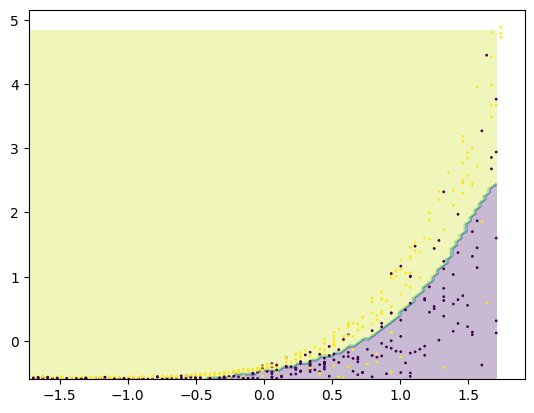

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


seed = 20
np.random.seed(seed)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size=0.25,
                                                        stratify=y)
print("Amostra de treino = %d | Amostras de teste = %d" % (len(treino_x), len(teste_y)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC(gamma='auto')
model.fit(treino_x, treino_y)
previsao = model.predict(teste_x)
acuracia = accuracy_score(teste_y, previsao) * 100
print("Acurácia = %.2f%%" % (acuracia))

data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)